In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("../../../../../Data/titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [47]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

# Imputation

In [48]:
df_imp = df.copy()
df_imp

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [49]:
df_imp['Age'].isnull().sum()

177

In [50]:
df_imp['Age'][ df_imp['Age'].isnull() ] = df_imp['Age'].dropna().sample( df_imp['Age'].isnull().sum() ).values

C:\Users\Jehan\AppData\Local\Temp\ipykernel_13600\2071288497.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_imp['Age'][ df_imp['Age'].isnull() ] = df_imp['Age'].dropna().sample( df_imp['Age'].isnull().sum() ).values
C:\Users\Jehan\Ap

In [51]:
df_imp.isnull().sum()

Age          0
Fare        45
Family       0
Survived     0
dtype: int64

# Check variance

In [52]:
check_df = pd.DataFrame([])

check_df['Age'] = df['Age']
check_df['Age_imp'] = df['Age']
check_df['Age_imp'][ check_df['Age_imp'].isnull() ] = check_df['Age_imp'].dropna().sample( check_df['Age_imp'].isnull().sum() ).values


check_df.isnull().sum()


C:\Users\Jehan\AppData\Local\Temp\ipykernel_13600\3261861335.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  check_df['Age_imp'][ check_df['Age_imp'].isnull() ] = check_df['Age_imp'].dropna().sample( check_df['Age_imp'].isnull().sum() ).

Age        177
Age_imp      0
dtype: int64

In [53]:
print(check_df['Age'].var())
print(check_df['Age_imp'].var())

211.0191247463081
212.10653097037755


# Check Distribution

<Axes: xlabel='Age', ylabel='Density'>

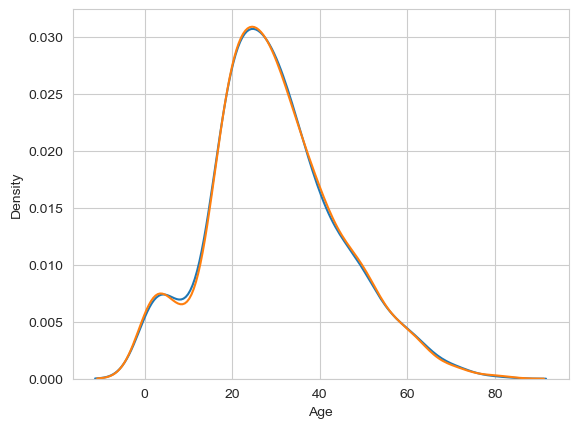

In [54]:
sns.kdeplot(data=check_df,x='Age')
sns.kdeplot(data=check_df,x='Age_imp')

# Check boxplot

<Axes: >

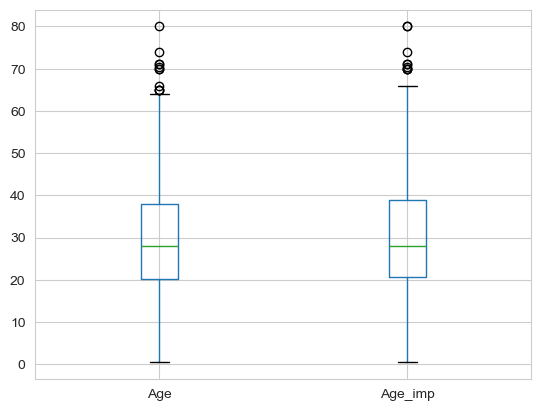

In [55]:
check_df.boxplot()